# Comparing with ML models

In [1]:
import numpy as np
import pandas as pd
import pickle
import re
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report

from transformers import pipeline
import more_itertools
from typing import List
from tqdm import tqdm

# If you set the display.max_colwidth option, the information will be displayed fully
pd.set_option('display.max_colwidth', None)

In [2]:
class CustomDataset:
    def __init__(
        self,
        name: str,
        train: List[pd.DataFrame],
        test: List[pd.DataFrame],
        label_list: List[str],
    ):
        """Class to hold and structure datasets.

        Args:

        name (str): holds the name of the dataset so we can select it later
        train (List[pd.DataFrame]): holds training pandas dataframe with 2 columns ["text","label"]
        test (List[pd.DataFrame]): holds testing pandas dataframe with 2 columns ["text","label"]
        label_list (List[str]): holds the list  of labels
        """
        self.name = name
        self.train = train
        self.test = test
        self.label_list = label_list

In [3]:
DATA_COLUMN = "text"
LABEL_COLUMN = "dialect"

In [4]:
df_dialect = pd.read_csv("dialect_dataset_modified.csv")

df_dialect = df_dialect[["text","dialect"]]  # we are interested in text and dialect only
df_dialect.columns = [DATA_COLUMN, LABEL_COLUMN]
print(df_dialect[LABEL_COLUMN].value_counts())

label_list_dialect = list(df_dialect[LABEL_COLUMN].unique())
print(label_list_dialect)

train_dialect, test_dialect = train_test_split(df_dialect, test_size=0.1, random_state=42, stratify=df_dialect[LABEL_COLUMN] )

print("Training length: ", len(train_dialect))
print("Testing length: ", len(test_dialect))

data_dialect = CustomDataset("Dialect", train_dialect, test_dialect, label_list_dialect)

EG    57636
PL    43742
KW    42109
LY    36499
QA    31069
JO    27921
LB    27617
SA    26832
AE    26296
BH    26292
OM    19116
SY    16242
DZ    16183
IQ    15497
SD    14434
MA    11539
YE     9927
TN     9246
Name: dialect, dtype: int64
['IQ', 'LY', 'QA', 'PL', 'SY', 'TN', 'JO', 'MA', 'SA', 'YE', 'DZ', 'EG', 'LB', 'KW', 'OM', 'SD', 'AE', 'BH']
Training length:  412377
Testing length:  45820


In [5]:
label_map = { v:index for index, v in enumerate(data_dialect.label_list) }
print(label_map)
inv_label_map = { v:k for k, v in label_map.items()}

{'IQ': 0, 'LY': 1, 'QA': 2, 'PL': 3, 'SY': 4, 'TN': 5, 'JO': 6, 'MA': 7, 'SA': 8, 'YE': 9, 'DZ': 10, 'EG': 11, 'LB': 12, 'KW': 13, 'OM': 14, 'SD': 15, 'AE': 16, 'BH': 17}


In [6]:
pred_df = pd.DataFrame([])
pred_df[DATA_COLUMN] = data_dialect.test[DATA_COLUMN].copy()
# max_len = 32

In [7]:
pipe = pipeline("sentiment-analysis", model="output_dir", device=0, return_all_scores =False) # max_length=max_len, truncation=True
preds = []
for s in tqdm(pred_df[DATA_COLUMN].to_list()):
    preds.append(pipe(s)[0]["label"])

  0%|                                                                              | 7/45820 [00:01<2:18:38,  5.51it/s]C:\Users\hazem\anaconda3\envs\pytorch\lib\site-packages\transformers\pipelines\base.py:899: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|████████████████████████████████████████████████████████████████████████████| 45820/45820 [08:54<00:00, 85.75it/s]


In [8]:
pred_df["Prediction"] = preds
pred_df

,text,Prediction
190813,@med_elmaghraoui ولفت صافي.. دابا كنعس 4 بالليل ونص ساعة بالنهار,MA
342376,@mahanaq8 ياخي مهنا عطني لجنه مخصصه لمكافحة الجراثيم النسائيه بشرط يكون معي مسدس للعقاب المباشر وعد مني خلال شهرين تنظف البلد من القذره والانجاس اللي مثل هلاشكال وشكرا,KW
105179,@Tramb_Al_garine شاورما قرود على على حليب حمير مع صاروخ حشيش نوع مضروب وش تتوقع النتيجة .أينشتاين مايقدر يتوقع نتيجة الخلطة ذي 😂😂😂,SA
108262,النااس اللي بتبني جديد \nقبل ما تعملوا تمديدات الكهرباء \nأسسوا للدات 😂😂,PL
172649,@hibaiseed \nتبغي ولا ما تبغي ..\nهذا اللي اجاكي يا حجة .\nالعرب مجبولين على الانقسام والتحزب والعنصرية على مستويات متطورة جدا.\nويظهرون العكس,AE
...,...,...
452071,دربٍ يحد النفس للضيق ينعاف ..\nيم السعه ياقلب الاقدام سقها ..,BH
90217,بيحرقوا في دمنا\n الله يحرقهم بس\nالله يسلط عليكم غضبه يارب https://t.co/gcIr0EA0im,PL
434852,@p_pm14 🤦🏻‍♀️ شيفع طبخ مو شكل 🤣,KW
189613,@mars_astrology على بعد يوم واحد من يوم مولدي ٣ جولاي؟,PL


Test accuracy = 0.5262330859886513
              precision    recall  f1-score   support

          IQ       0.49      0.31      0.38      2630
          LY       0.26      0.40      0.31      2629
          QA       0.55      0.51      0.53      1618
          PL       0.78      0.85      0.81      5764
          SY       0.67      0.48      0.56      1550
          TN       0.35      0.34      0.34      2792
          JO       0.41      0.62      0.49      4211
          MA       0.75      0.54      0.63      2762
          SA       0.72      0.62      0.66      3650
          YE       0.60      0.64      0.62      1154
          DZ       0.64      0.23      0.34      1912
          EG       0.43      0.67      0.52      4374
          LB       0.49      0.41      0.45      3107
          KW       0.46      0.42      0.44      2683
          OM       0.84      0.58      0.69      1443
          SD       0.51      0.31      0.38      1624
          AE       0.54      0.46      0.50   

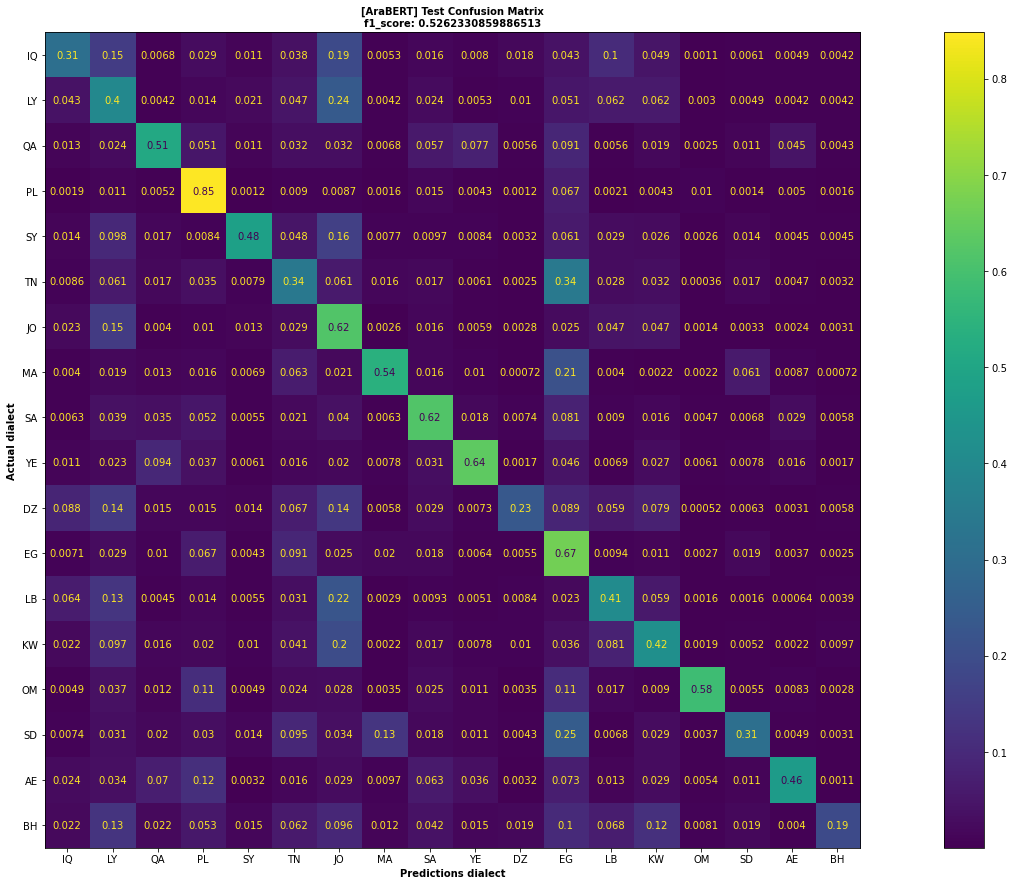

In [9]:
y_test = data_dialect.test[LABEL_COLUMN]
y_test_pred = pred_df["Prediction"]
modelname = "AraBERT"

# Check test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print('Test accuracy = {}'.format(test_accuracy))

## Show results
print(classification_report(y_test, y_test_pred, target_names=label_list_dialect))

fig, ax = plt.subplots(1,1,figsize= (30,15))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred ,normalize ='true' ), display_labels=label_list_dialect).plot(ax=ax);
ax.set_title(f"[{modelname}] Test Confusion Matrix\nf1_score: {f1_score(y_test, y_test_pred, average='micro')}",font ={'weight' : 'bold'})
ax.set_xlabel('Predictions dialect',font ={'weight' : 'bold'})
ax.set_ylabel('Actual dialect',font ={'weight' : 'bold'})
plt.savefig("Models/"+modelname+'_results.png', dpi=150, bbox_inches='tight')
plt.show()